### Problem 1: Clustering

#### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

##### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

##### 1.2  Do you think scaling is necessary for clustering in this case? Justify.

##### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

##### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

##### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.


#### Data Dictionary for Market Segmentation:

* spending: Amount spent by the customer per month (in 1000s)

* advance_payments: Amount paid by the customer in advance by cash (in 100s)

* probability_of_full_payment: Probability of payment done in full by the customer to the bank

* current_balance: Balance amount left in the account to make purchases (in 1000s)

* credit_limit: Limit of the amount in credit card (10000s)

* min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)

* max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier 

#### Ques 1.1) Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).


#### - Read the data and do exploratory data analysis (3 pts). Describe the data briefly. Interpret the inferences for each (3 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct

In [2]:
# Reading Dataset in the notebook.

bank = pd.read_csv('D:\\Study\\Data Science and Machine Learning\\Great_learning course\Main content\\Module4 - Data Mining\\Week5,6 - Project\\bank_marketing_part1_Data.csv')

#### Performing Basic EDA.

In [3]:
# Checking top 5 rows of the dataset.

bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
# Checking the statistical summary of the dataframe.

bank.describe() # Five point summary of the continuous attributes.

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


#### Inference:

* Range of probabiblity_of_full_payment is 80 percent to 91 percent with a mean of 87 percent, which makes it an important attribute in segmentation of the customers. 

* Customers spendings are varying with a standard deviation of approx 3 thousand. 75% customers have monthly spending under 17.30 thousand. Therefore, with a maximum spending of 21 thousand, the attribute spending seems a little right skewed. 

* Also the interesting part in the data is current_balance, it seems everyone in the dataset has minimum balance of around 5 thousand, but despite a little variation in spending data, the current balance data is not varying much, it may be due to variation in credit limit.

* So, by looking at the data description superficially, i can presume attributes like spending, current balance, credit_limit and probabibility_full_payment can be the variables which can help in deciding the segmentation of customers. 

* However, variables like 'spending', 'advance_payments' and min_payment_amt' are showing some variation in the data points and seem to be right skewed.  

In [5]:
# Checking dataset information.

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


##### Inference : 

* The dataset has 7 columns and 210 rows.

* All the variables in the data are present in float data types.


In [6]:
# Checking Null values in the dataset.

bank.isnull().any()

spending                        False
advance_payments                False
probability_of_full_payment     False
current_balance                 False
credit_limit                    False
min_payment_amt                 False
max_spent_in_single_shopping    False
dtype: bool

##### Inference:

* There is no null value in the data set.

#### Plotting the histograms.

array([[<AxesSubplot:title={'center':'spending'}>,
        <AxesSubplot:title={'center':'advance_payments'}>,
        <AxesSubplot:title={'center':'probability_of_full_payment'}>],
       [<AxesSubplot:title={'center':'current_balance'}>,
        <AxesSubplot:title={'center':'credit_limit'}>,
        <AxesSubplot:title={'center':'min_payment_amt'}>],
       [<AxesSubplot:title={'center':'max_spent_in_single_shopping'}>,
        <AxesSubplot:title={'center':'clusters'}>,
        <AxesSubplot:title={'center':'kmean_2'}>]], dtype=object)

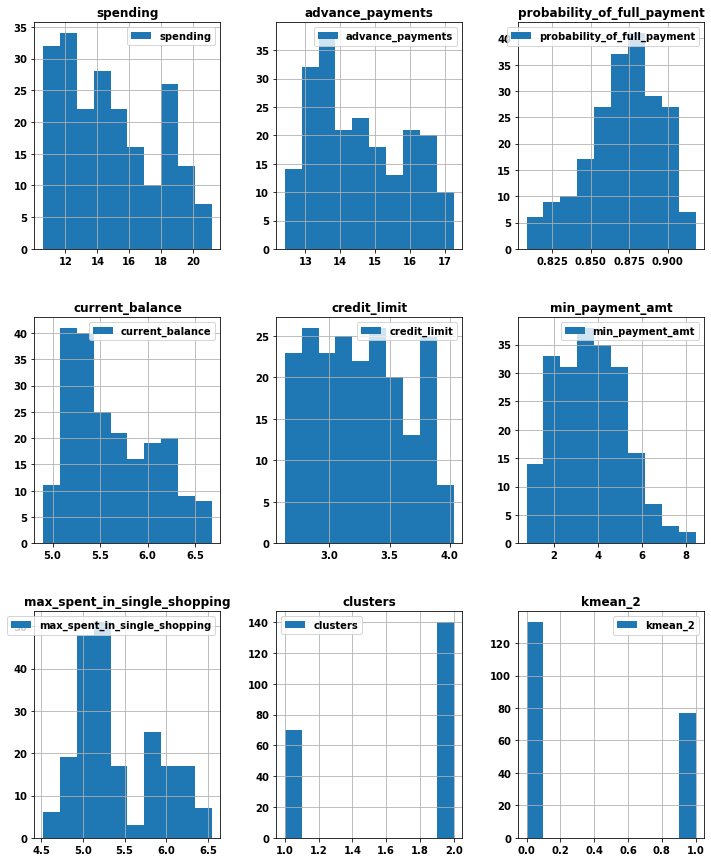

In [207]:
#Plot to see the individual distribution of every continuous feature.

bank.hist(figsize=(12,15),legend= True)


#### Inference: Analysing every feature by observing their histplots :

* Spending: We can easily observe that there are three groups of customers in the spending attribute, one group of 85-90 customers spend between 10-14 thousand per month, second group of somewhere near 80 customers who spend between 14-18 thousand every month, then there is a the last group of somewhat near 40-45 customers who spend 18-20 thousand every month. 

* advance_payments : Most of the customers that is approximately near 85-90 pay 1200-1400 in advance cash, and around 80 customers pay between 1400-1600 in advance and comparatively less customers that is around 50 tend to pay 1600 or more in advance. 

* probability_of_full_payment : As we can clearly see that this attribute shows a left-skewness with maximum numbers of customers having probabibility of making full payment is between 85-90 percent. 

* current_balance : By observing the plot, we can say that the majority of the customers have credit card balance between 5000-6000 and rest have between 6000-6700.

* credit_limit : By observing the plot above, we can conclude that there are proportionately distributed customers with credit card limit varying from 20000 to 40000. Therefore as a result we can see despite variation in spending attribute we cannot notice major variation in current_balance feature. 

* min_payment_amount : Most of the customers paid minimum amount between 200 to 600 while making purchases in a month. 


* max_spent_in_single_shopping : Most of the customers spend maximum amount between 5000-5500 in one purchase. 

#### Checking the skewness in the data set.

In [8]:
# Checking the skewness

skewness = pd.DataFrame({'Skewness' : [stats.skew(bank.spending),stats.skew(bank.advance_payments),stats.skew(bank.probability_of_full_payment),
                                                                           stats.skew(bank.current_balance),stats.skew(bank.credit_limit),
                                      stats.skew(bank.min_payment_amt),stats.skew(bank.max_spent_in_single_shopping)]},
                        index =['spending','advance_payments','probability_of_full_payment','current_balance','credit_limit','min_payment_amt','max_spent_in_single_shopping'])

skewness

,Skewness
spending,0.397027
advance_payments,0.383806
probability_of_full_payment,-0.534104
current_balance,0.521721
credit_limit,0.133416
min_payment_amt,0.398793
max_spent_in_single_shopping,0.557876


#### Inference: 

* Attributes like 'current_balance', 'max_spent_in_single_shopping' are right skewed and the attribute 'probability_of_full_payment' is left skewed.

* Also the attributes like 'min_payment_amt', 'spending' and 'advance_payments' is minutely right skewed.

* And credit_limit is hardly any skewed.

#### Checking outliers by plotting boxplots:

In [9]:
# Making function to plot boxplots for all the columns of dataset 'bank' 

def boxplot_bank(column,nbins):
    plt.figure()
    print("Boxplot of " + column)
    sns.boxplot(x=bank[column])
    plt.show()
    print("------------------------------")

In [10]:
# Making list of values present in each columns of the dataset 'bank'

list_bank = list(bank.columns.values)

Boxplot of spending


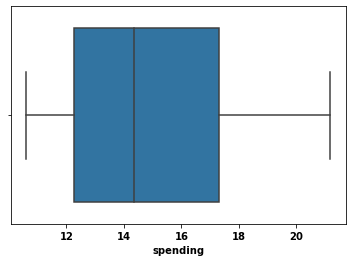

------------------------------
Boxplot of advance_payments


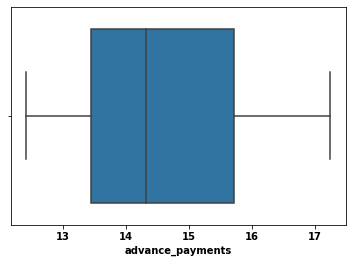

------------------------------
Boxplot of probability_of_full_payment


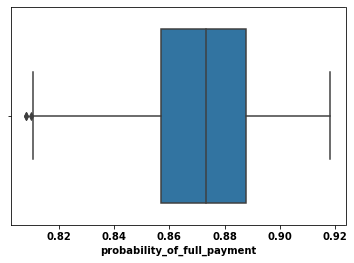

------------------------------
Boxplot of current_balance


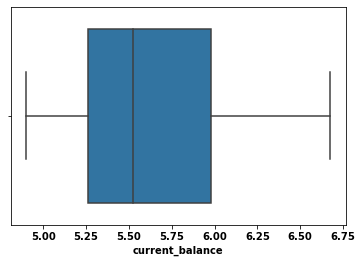

------------------------------
Boxplot of credit_limit


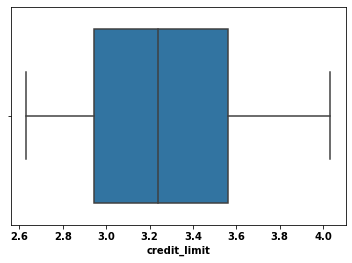

------------------------------
Boxplot of min_payment_amt


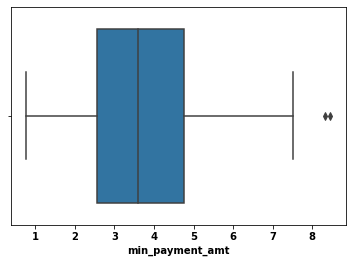

------------------------------
Boxplot of max_spent_in_single_shopping


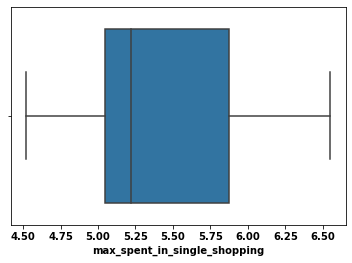

------------------------------


In [11]:
# Making for loop for plotting boxplots:

for x in list_bank:
    boxplot_bank(x,50)

#### Inference :

* As we can notice from the above boxplots, the variables consisting of outliers are as follows:

1) probability_of_full_payment

2) min_payment_amt

#### Checking correlation among the variables and plotting heatmap.

In [209]:
bank.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,kmean_2
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.858415,0.867907
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.860864,0.873411
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.401994,0.413746
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.847295,0.858815
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.799451,0.811571
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.028777,-0.111489
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,-0.878712,0.874730
clusters,-0.858415,-0.860864,-0.401994,-0.847295,-0.799451,0.028777,-0.878712,1.000000,-0.929320
kmean_2,0.867907,0.873411,0.413746,0.858815,0.811571,-0.111489,0.874730,-0.929320,1.000000


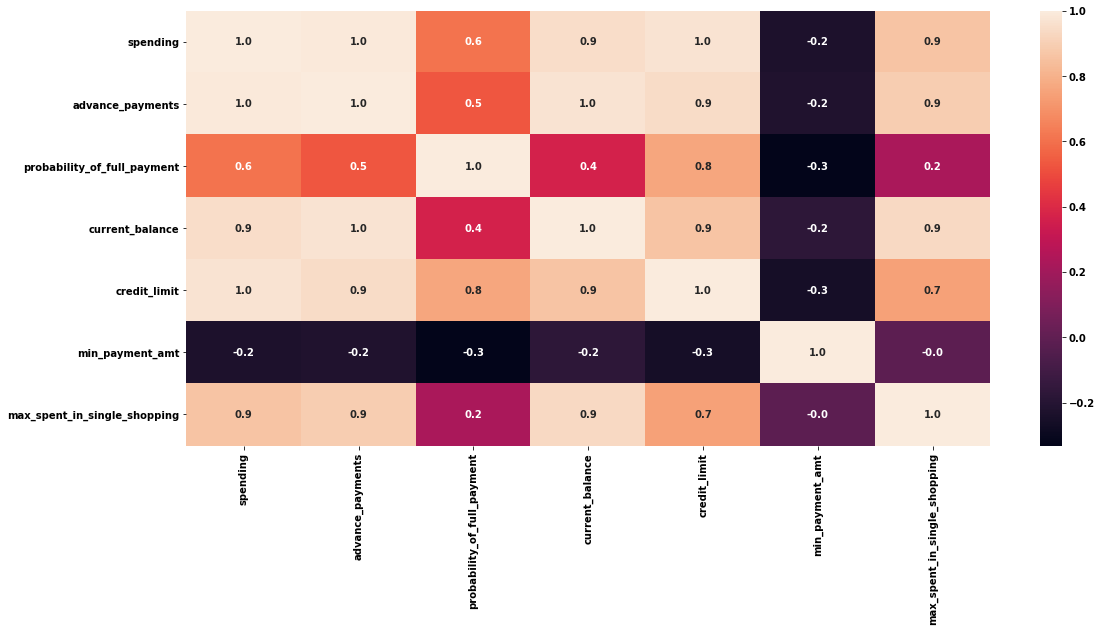

In [13]:
plt.figure(figsize=(18,8))
sns.heatmap(bank.corr(), annot=True, fmt='.1f')
plt.show()

#### Inference:

* All the variables are strongly positive related with each other except a few variables that are as follows:

* Variables like 'min_payment_amt' are negatively correlated with all the other variables.

* Variables like 'probability_of_full_payment','current_balance' and 'max_spending_in_single_shopping' are not strongly correlated with each other.


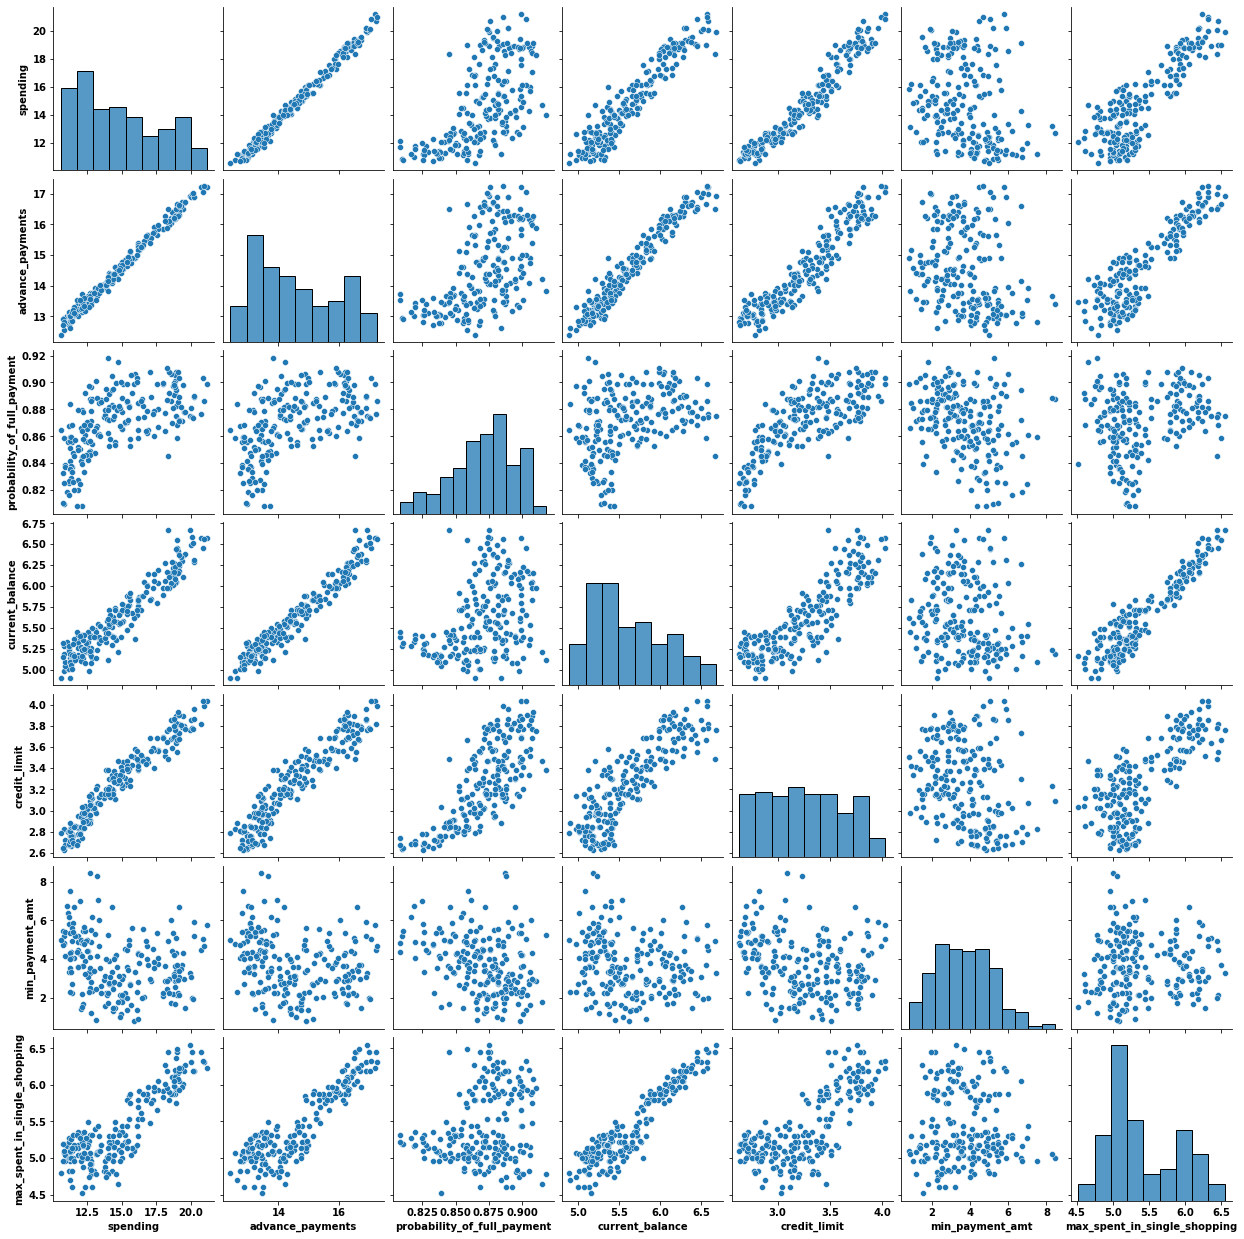

In [14]:
# Plotting pair plot:

sns.pairplot(bank)
plt.show()

#### Inference:

1) Almost all the variables are showing collinearity except a few variables are as follows:

* min_payment_amount, probability_of_full_payment, current_balance and max_spending_in_single_shopping. 

#### Ques 1.2)  Do you think scaling is necessary for clustering in this case? Justify.

#### Do you think scaling is necessary for clustering in this case? Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works.

In [15]:
# Let's check the standard deviation of the variables in the dataset.

bank.std()

spending                        2.909699
advance_payments                1.305959
probability_of_full_payment     0.023629
current_balance                 0.443063
credit_limit                    0.377714
min_payment_amt                 1.503557
max_spent_in_single_shopping    0.491480
dtype: float64

Answer: By observing the variation in standard deviation of the variables. Yes, I think scaling is necessary for clustering in this case, because variables are not lying in the same scale, and there are a few variables like spending, advance_payment and min_amount_payment which are showing relatively high variation in the data points in comparison to other variables, so scaling will convert all variables into specific range using a linear transformation which generate good quality clusters and improve the accuracy of clustering algorithms.  

I'll use standard scaling function for standardization, which will scale values to subtract the mean to center them on 0.0 and divide by the standard deviation of 1.0. First a StandardScaler instance is defined with default hyperparameters.
Once defined, we can call the fit_transform() function amd pass it to our dataset to create a transformed version of our dataset.

#### Ques 1.3) Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

#### Apply hierarchical clustering to scaled data (3 pts). Identify the number of optimum clusters using Dendrogram and briefly describe them (4). Students are expected to apply hierarchical clustering. It can be obtained via Fclusters or Agglomerative Clustering. Report should talk about the used criterion, affinity and linkage. Report must contain a Dendrogram and a logical reason behind choosing the optimum number of clusters and Inferences on the dendrogram. Customer segmentation can be visualized using limited features or whole data but it should be clear, correct and logical. Use appropriate plots to visualize the clusters.

In [16]:
# Lets scale the data using StandardScaler().fit_transform function..

bank_scaled = StandardScaler().fit_transform(bank) 

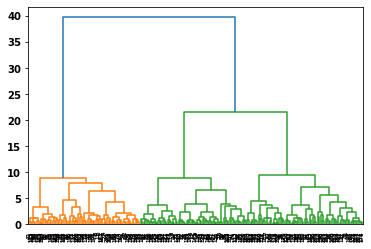

In [17]:
# Performing hierarchial clusttering to scaled data.

wardlink_bank_scaled = linkage(bank_scaled, method='ward') 
dend = dendrogram(wardlink_bank_scaled)

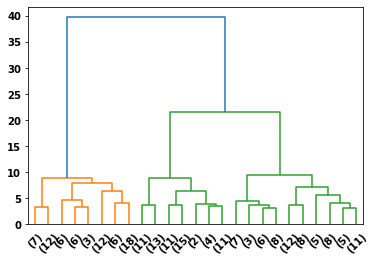

In [18]:
dend = dendrogram(wardlink_bank_scaled,
                 truncate_mode='lastp',
                 p = 25,
                 )

#### Inference: 

* As we can see above in the dendogram, the optimal number of clusters formed using hierarchical clustering and ward linkage method is 2. 

* Ward linkage method is used for clustering, this method works similar to group average and cetroid distance method by minimizing the within cluster variation.


In [19]:
# Method 1 - Identifying the number of clusters based on dendrogram by 'maxclust method'

clusters = fcluster(wardlink_bank_scaled, 2, criterion= 'maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

#### Inference: 

* In method 1, we identified number of clusters using fcluster module and set criterion as maxclust, and we get the 2 as an optimal number of clusters.   

In [20]:
# Method 2 - Identifying the number of clusters based on dendrogram by 'distance method'

cluster = fcluster(wardlink_bank_scaled, 25, criterion='distance')
cluster

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

#### Inference:

* In method 2, we identified number of clusters using flcusters module and set criterion as distance and we get 2 as an optimal number of clusters. 

In [21]:
# Append clusters to the original data. 

In [22]:
bank['clusters'] = clusters

In [23]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


#### Cluster profiles

In [24]:
aggdata=bank.iloc[:,0:8].groupby('clusters').mean()
aggdata['Freq']=bank.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,13.085571,13.766214,0.864298,5.363714,3.045593,3.730723,5.103421,140


<AxesSubplot:xlabel='clusters'>

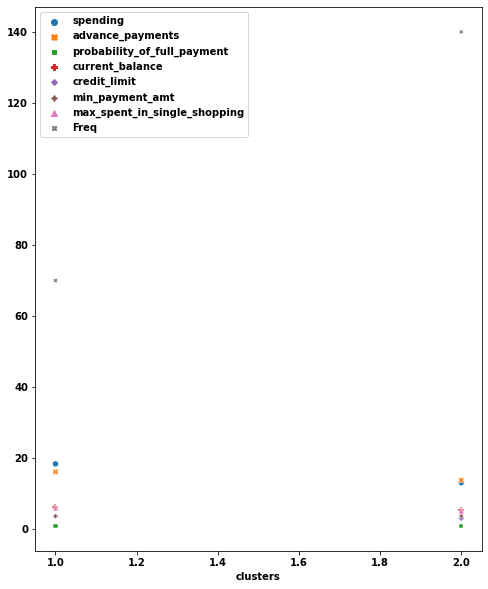

In [25]:
plt.figure(figsize=(8,10))
sns.scatterplot(data=aggdata)

#### Inference: 

* From the above graph and table, we can infer that the cluster 1 and cluster 2 have 70 and 140 data points simultaenously. 

* There is an evident difference appearing in mean of some features among customers in clusters 1 and 2. Those features are 'spending', 'advance_payments', 'current_balance', 'max_spent_in_single_shopping' etc. 

* However, there are some features which do not show much difference, such as 'probability_of_full_payment', 'credit_limit' and 'min_payment_amount'. 

#### Ques 1.4) Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

* Apply K-Means clustering on scaled data and determine optimum clusters (2 pts). Apply elbow curve and silhouette score (3 pts). Interpret the inferences from the model (2.5 pts). K-means clustering code application with different number of clusters. Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K. Reasoning behind the selection of the optimal value of K must be explained properly. Silhouette Score must be calculated for the same values of K taken above and commented on. Report must contain logical and correct explanations for choosing the optimum clusters using both elbow method and silhouette scores. Append cluster labels obtained from K-means clustering into the original data frame. Customer Segmentation can be visualized using appropriate graphs.

In [26]:
# Create K Means cluster and store the result in the object k_means

k_means = KMeans(n_clusters = 2)

In [27]:
# Fit K means on the bank_scaled

k_means.fit(bank_scaled)

KMeans(n_clusters=2)

#### Cluster Output for all the observations

In [28]:
# Get the labels
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

#### Within Cluster Sum of Squares

In [29]:
k_means.inertia_

659.1717544870411

#### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [30]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(bank_scaled)
k_means.inertia_

1469.9999999999995

In [31]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(bank_scaled)
k_means.inertia_

430.65897315130064

In [32]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(bank_scaled)
k_means.inertia_

371.38509060801107

In [33]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(bank_scaled)
k_means.inertia_

327.2127816566134

In [34]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(bank_scaled)
k_means.inertia_

289.315995389595

* WSS reduces as K keeps increasing

#### Calculating WSS for other values of K - Elbow Method

In [35]:
wss =[] 

In [36]:
for i in range(1,9):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(bank_scaled)
    wss.append(KM.inertia_)

In [37]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.38509060801107,
 327.2127816566134,
 289.315995389595,
 262.98186570162267,
 241.8189465608603]

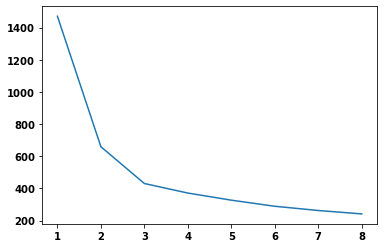

In [38]:
plt.plot(range(1,9), wss)

#### Inference: 

* 1) From the above plot, we can visualise the elbow in the curve, which clearly indicates the 2 to be the optimal number of clusters. 

* 2) After checking within clusters sum of squares with different numbers and by also observing the sharp decline in the wss score, we can also infer that the 2 is the optimal number of clusters in this case. 

### Let's check the labels with clusters number 2 and also find out its silhouette score.

In [39]:
# KMeans with K=2

k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(bank_scaled)
labels_k_2 = k_means.labels_

In [40]:
#### Cluster evaluation for 2 clusters: the silhouette score

from sklearn.metrics import silhouette_samples, silhouette_score

In [41]:
# Calculating silhouette_score


silhouette_score(bank_scaled, labels_k_2)

0.46577247686580914

In [42]:
bank['kmean_2'] = labels_k_2
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,kmean_2
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


#### Inference: 

* After observing the wss elbow plot, we can say that there are 2 optimal clusters, which is further validated by the silhouette score. 

#### Cluster Profiling

In [43]:
bank.kmean_2.value_counts().sort_index()

0    133
1     77
Name: kmean_2, dtype: int64

In [44]:
clust_profile=bank.groupby('kmean_2').mean()
clust_profile['freq']=bank.kmean_2.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,freq
kmean_2,,,,,,,,,
0,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,2.000000,133
1,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,1.090909,77


##### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

#### Inference on Cluster profiles: 

* 1) We have three clusters namely, 0,1 which includes 133 and 77 data points simultaenously. 
* 2) Cluster '0' has customers who show tendency of low average spending, and lesser average advance_payments, and their chances of full payment is also comparatively lower than customers in cluster 1 i.e. 86.35%, but showing respectable average current balance of 5.33 which is not very less than customers in cluster 1, their average min_payment_amount feature is a bit higher than cluster 1, and likewise the max_spent_in_single_shopping feature is also not very less, therefore we can conclude that only starting four features show clear disctinct between the two clusters which is good enough to make further strategies. 
* 3) Cluster '1' has customers with more average spending, advance_payments, more probability of full payment that is 88.38%, better current balance,  and less min_amount_payment, more max_spent_in_single_shopping.

#### Recommendations:

* 1) Therefore, it is quite evident that the cluster 0 has customers whom we should not approach with our premium offers or instead we should restrict their credit_limit so that we don't loose much money. However, their probability of full payment is not much less than the other cluster. 
* 2) On the other hand, we can offer more offers to the customers in clusters 1, we can increase their credit limit and provide aditional features to these customers. 

#### Problem 2: CART-RF-ANN

#### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

#### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

#### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network.

#### 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

#### 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

#### 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations.


#### Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9. The commission received for tour insurance firm (Commission is in percentage of sales)
10.Age of insured (Age)

#### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

* Read the data and do exploratory data analysis (4 pts). Describe the data briefly. Interpret the inferences for each (2 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [45]:
# Loading data set.

insurance = pd.read_csv('D:\Study\Data Science and Machine Learning\Great_learning course\Main content\Module4 - Data Mining\Week5,6 - Project\insurance_part2_data-2.csv')

In [46]:
# Checking the top 5 columns of the data set.

insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [47]:
# Checking the data information.

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


#### Inference: 

* There are 10 columns and 3000 rows in the data set
* 6 features columns are in object data type, 2 int64 and 2 float64. 
* The target feature Claimed is in object data type which we'll need to convert into categorical and int data type.
* There are few unnecassary features which we'll not need in our model building, like agency code.

In [48]:
# Checking the data statistical summary.

insurance.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [49]:
# Checking the null values.

insurance.isnull().any()

Age             False
Agency_Code     False
Type            False
Claimed         False
Commision       False
Channel         False
Duration        False
Sales           False
Product Name    False
Destination     False
dtype: bool

In [50]:
# Checking the shape of the data.

insurance.shape

(3000, 10)

In [51]:
# Renaming a column 'product name' to 'Product_Name' 


insurance['Product_Name'] = insurance['Product Name']

#### Dropping the unwanted variables

In [52]:
insurance1 = insurance.drop(["Product Name","Agency_Code",],axis=1)

#### Geting unique counts of all Objects

In [53]:
print('Type \n',insurance1.Type.value_counts())
print('\n')
print('Claimed \n',insurance1.Claimed.value_counts())
print('\n')
print('Channel \n',insurance1.Channel.value_counts())
print('\n')
print('Product Name \n',insurance1.Product_Name.value_counts())
print('\n')
print('Destination \n',insurance1.Destination.value_counts())
print('\n')


Type 
 Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


Claimed 
 No     2076
Yes     924
Name: Claimed, dtype: int64


Channel 
 Online     2954
Offline      46
Name: Channel, dtype: int64


Product Name 
 Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product_Name, dtype: int64


Destination 
 ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64




### Note:
Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 

The following code loops through each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category.

In [54]:
for feature in insurance1.columns: 
    if insurance1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(insurance1[feature].unique()))
        print(pd.Categorical(insurance1[feature].unique()).codes)
        insurance1[feature] = pd.Categorical(insurance1[feature]).codes



feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


feature: Product_Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


#### Inference: 
##### * For each feature, look at the 2nd and 4th row to get the encoding mappings. Do not look at the line starting with 'Categories'

In [55]:
insurance1.head()

,Age,Type,Claimed,Commision,Channel,Duration,Sales,Destination,Product_Name
0,48,0,0,0.70,1,7,2.51,0,2
1,36,1,0,0.00,1,34,20.00,0,2
2,39,1,0,5.94,1,3,9.90,1,2
3,36,1,0,0.00,1,4,26.00,0,1
4,33,0,0,6.30,1,53,18.00,0,0


#### Comparing the unique counts from above

In [56]:
print('Type \n',insurance1.Type.value_counts())
print('\n')
print('Claimed \n',insurance1.Claimed.value_counts())
print('\n')
print('Channel \n',insurance1.Channel.value_counts())
print('\n')
print('Product Name \n',insurance1.Product_Name.value_counts())
print('\n')
print('Destination \n',insurance1.Destination.value_counts())
print('\n')


Type 
 1    1837
0    1163
Name: Type, dtype: int64


Claimed 
 0    2076
1     924
Name: Claimed, dtype: int64


Channel 
 1    2954
0      46
Name: Channel, dtype: int64


Product Name 
 2    1136
1     678
0     650
4     427
3     109
Name: Product_Name, dtype: int64


Destination 
 0    2465
1     320
2     215
Name: Destination, dtype: int64




In [57]:
#### Checking the data information again:

insurance1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Type          3000 non-null   int8   
 2   Claimed       3000 non-null   int8   
 3   Commision     3000 non-null   float64
 4   Channel       3000 non-null   int8   
 5   Duration      3000 non-null   int64  
 6   Sales         3000 non-null   float64
 7   Destination   3000 non-null   int8   
 8   Product_Name  3000 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 108.5 KB


In [58]:
insurance1.head()

,Age,Type,Claimed,Commision,Channel,Duration,Sales,Destination,Product_Name
0,48,0,0,0.70,1,7,2.51,0,2
1,36,1,0,0.00,1,34,20.00,0,2
2,39,1,0,5.94,1,3,9.90,1,2
3,36,1,0,0.00,1,4,26.00,0,1
4,33,0,0,6.30,1,53,18.00,0,0


* Label encoding has been done and all columns are converted to numbers. 

#### Proportions of 1s and 0s

In [59]:
insurance1.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

#### Plotting the histograms.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Type'}>,
        <AxesSubplot:title={'center':'Claimed'}>],
       [<AxesSubplot:title={'center':'Commision'}>,
        <AxesSubplot:title={'center':'Channel'}>,
        <AxesSubplot:title={'center':'Duration'}>],
       [<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Destination'}>,
        <AxesSubplot:title={'center':'Product_Name'}>]], dtype=object)

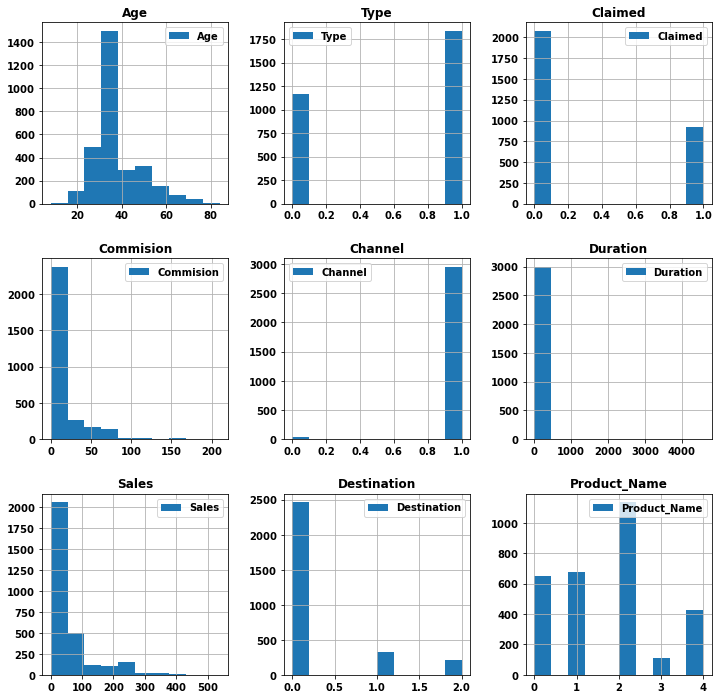

In [60]:
#Plot to see the individual distribution of every continuous feature.

insurance1.hist(figsize=(12,12),legend= True)

#### Inference: 

* Most of the population is young, age lies between 20 to 40.

* Most of the population gets less than 20% commision. 

* Column Duration shows some anomalies, and outliers so, it has to be treated. However, most of the population took tour cover for less than 100 days. 

* Most of the sales are procures seems around 50. 

#### Checking outliers by plotting boxplots:

In [61]:
# Making function to plot boxplots for all the columns of dataset 'insurance' 

def boxplot_insurance1(column,nbins):
    plt.figure()
    print("Boxplot of " + column)
    sns.boxplot(x=insurance1[column])
    plt.show()
    print("------------------------------")

In [62]:
# Making list of values present in each columns of the dataset 'bank'

list_insurance1 = list(insurance1.columns.values)

Boxplot of Age


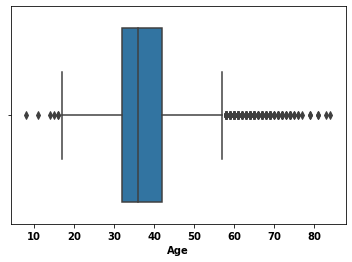

------------------------------
Boxplot of Type


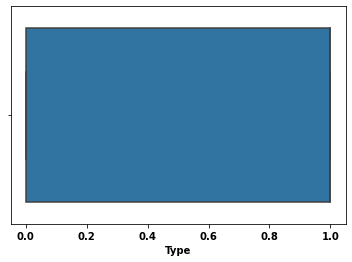

------------------------------
Boxplot of Claimed


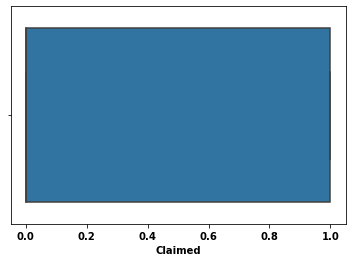

------------------------------
Boxplot of Commision


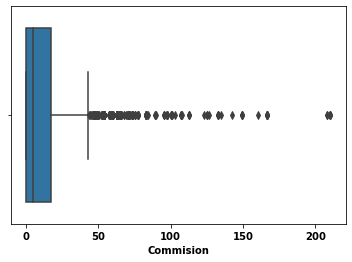

------------------------------
Boxplot of Channel


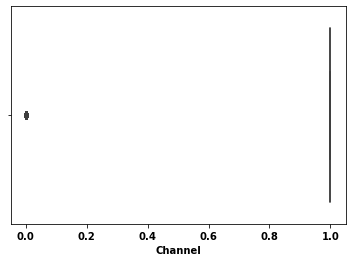

------------------------------
Boxplot of Duration


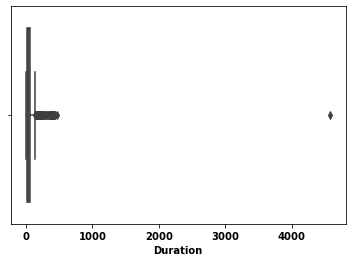

------------------------------
Boxplot of Sales


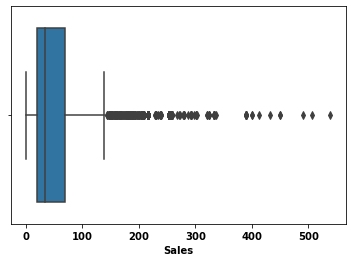

------------------------------
Boxplot of Destination


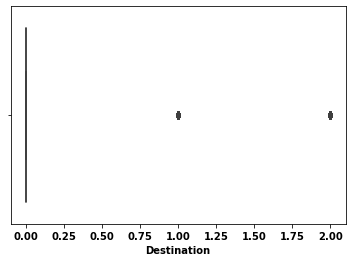

------------------------------
Boxplot of Product_Name


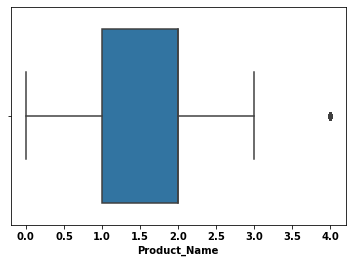

------------------------------


In [63]:
# Making for loop for plotting boxplots:

for x in list_insurance1:
    boxplot_insurance1(x,50)

#### Inference:

* Most of the features like 'Age', 'Commision', 'Sales' and 'Duration' have outliers.

In [64]:
insurance1.columns

Index(['Age', 'Type', 'Claimed', 'Commision', 'Channel', 'Duration', 'Sales',
       'Destination', 'Product_Name'],
      dtype='object')

#### Checking the skewness in the data set.

In [65]:
# Checking the skewness

skewness = pd.DataFrame({'Skewness' : [stats.skew(insurance1.Age),stats.skew(insurance1.Type),stats.skew(insurance1.Claimed),
                                                                           stats.skew(insurance1.Commision),stats.skew(insurance1.Channel),
                                      stats.skew(insurance1.Duration),stats.skew(insurance1.Sales),stats.skew(insurance1.Destination),stats.skew(insurance1.Product_Name)]},
                        index =['Age', 'Type', 'Claimed', 'Commision', 'Channel', 'Duration', 'Sales',
       'Destination', 'Product_Name'])

skewness

,Skewness
Age,1.149138
Type,-0.461122
Claimed,0.831769
Commision,3.147283
Channel,-7.888787
Duration,13.777788
Sales,2.379958
Destination,2.187461
Product_Name,0.432453


#### Inference: 

* Features like Age, Commision, Duration, Sales and Destination seems right skewed. 

* And features like Type, Claimed, Channel, Product_Name.

#### Checking correlation among the variables and plotting heatmap.

In [66]:
insurance1.corr()

,Age,Type,Claimed,Commision,Channel,Duration,Sales,Destination,Product_Name
Age,1.000000,-0.048992,-0.030027,0.067717,-0.068927,0.030425,0.039455,0.004750,0.020643
Type,-0.048992,1.000000,-0.343505,-0.216599,-0.099291,-0.198219,-0.254868,0.317289,-0.008416
Claimed,-0.030027,-0.343505,1.000000,0.297498,-0.016641,0.214923,0.348877,-0.023851,0.257951
Commision,0.067717,-0.216599,0.297498,1.000000,0.033563,0.471389,0.766505,0.184017,0.399306
Channel,-0.068927,-0.099291,-0.016641,0.033563,1.000000,-0.019389,0.037418,0.035373,-0.037859
Duration,0.030425,-0.198219,0.214923,0.471389,-0.019389,1.000000,0.558930,-0.019665,0.354763
Sales,0.039455,-0.254868,0.348877,0.766505,0.037418,0.558930,1.000000,0.094267,0.474634
Destination,0.004750,0.317289,-0.023851,0.184017,0.035373,-0.019665,0.094267,1.000000,0.021528
Product_Name,0.020643,-0.008416,0.257951,0.399306,-0.037859,0.354763,0.474634,0.021528,1.000000


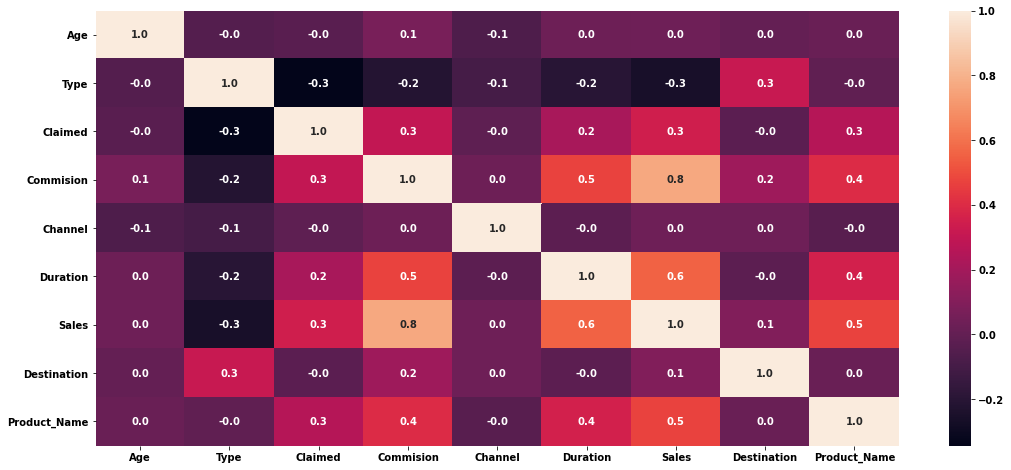

In [67]:
plt.figure(figsize=(18,8))
sns.heatmap(insurance1.corr(), annot=True, fmt='.1f')
plt.show()

#### Inference:

* Commision and Duration are positively skewed (0.5).

* Commision and Sales are highly positive skewed (0.8). 

* Sales and Duration are positively skewed (0.6). 

* Sales and Product_Name are positively skewed (0.5).

* Type and Sales are negatively skewed (-0.3).

* Type and Commision are negatively skewed (-0.2).

* Type and Claimed are negatively skewed (-0.3).

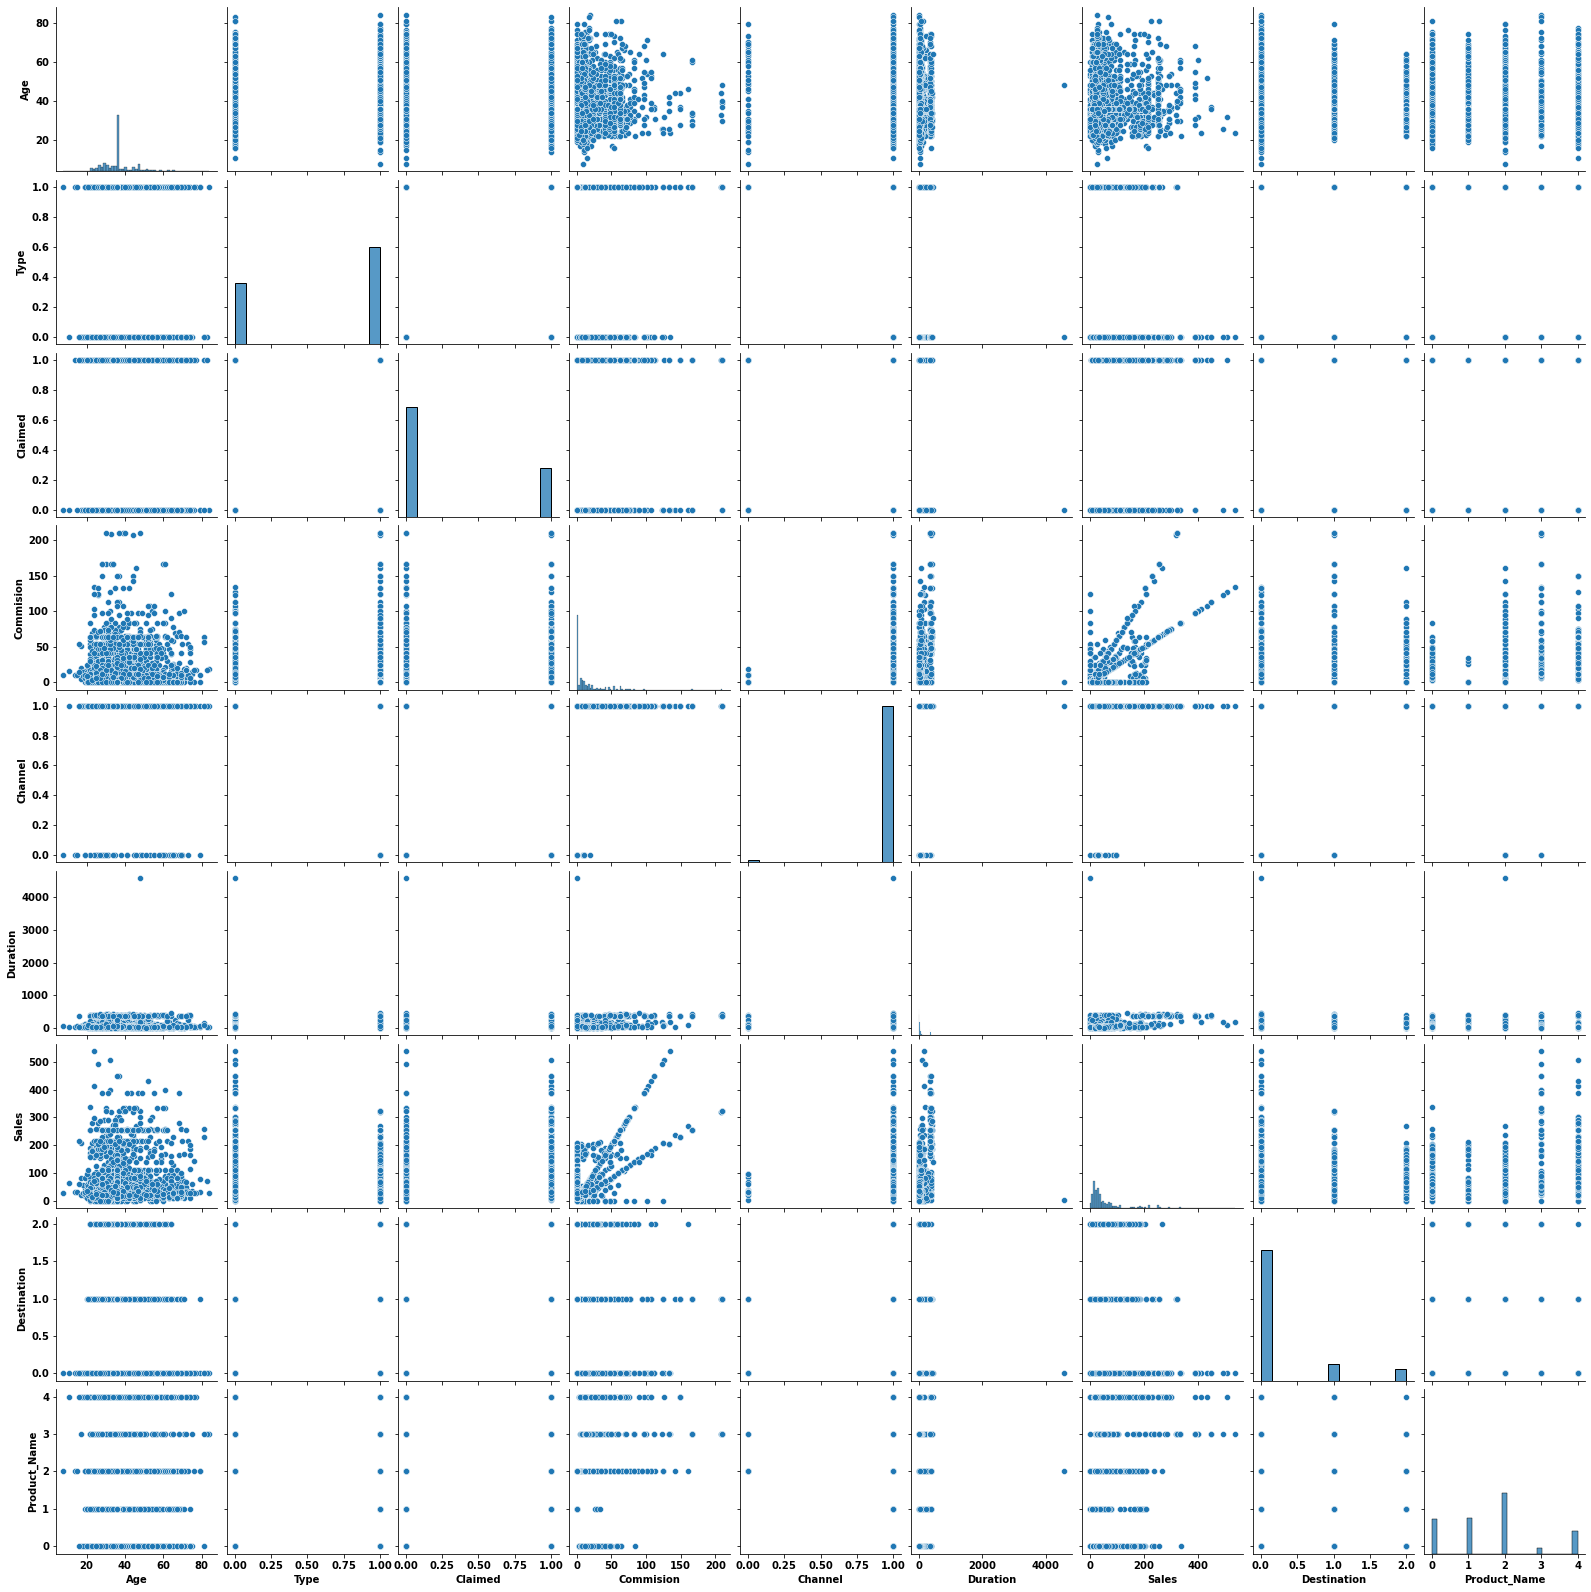

In [68]:
# Plotting pair plot:

sns.pairplot(insurance1)
plt.show()

#### Inference: 

* Only variables 'Sales' and 'Commision' show collinearity.  

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network.

* Data Split: Split the data into test and train(1 pts), build classification model CART (1.5 pts), Random Forest (1.5 pts), Artificial Neural Network(1.5 pts). Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. Use of random state is mandatory. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Apply grid search for each model and make models on best_params. Feature importance for each model.

#### Extracting the target column into separate vectors for training set and test set

In [69]:
X = insurance1.drop("Claimed", axis=1)

y = insurance1.pop("Claimed")

X.head()

,Age,Type,Commision,Channel,Duration,Sales,Destination,Product_Name
0,48,0,0.70,1,7,2.51,0,2
1,36,1,0.00,1,34,20.00,0,2
2,39,1,5.94,1,3,9.90,1,2
3,36,1,0.00,1,4,26.00,0,1
4,33,0,6.30,1,53,18.00,0,0


#### Splitting data into training and test set

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)

#### Checking the dimensions of the training and test data

In [141]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',2100+900)

X_train (2100, 8)
X_test (900, 8)
train_labels (2100,)
test_labels (900,)
Total Obs 3000


#### Model 1 - Building a Decision Tree Classifier

In [149]:
dtree = DecisionTreeClassifier(max_depth=10,random_state=0, criterion = 'gini')

In [150]:
dtree.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [151]:
#### Visualising tree

In [152]:
from sklearn import tree

train_char_label = ['No','Yes']

insurance_tree_file = open('D:\Study\Data Science and Machine Learning\Great_learning course\Main content\Module4 - Data Mining\Week5,6 - Project\dtree visualisation\insurance_tree.dot','w') 

dot_data = tree.export_graphviz(dtree, out_file=insurance_tree_file, feature_names = list(X_train), class_names = list(train_char_label))

insurance_tree_file.close()

#### let's look at important features.

In [153]:
(print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns)))

                   Imp
Age           0.145689
Type          0.000000
Commision     0.184594
Channel       0.008129
Duration      0.172908
Sales         0.183068
Destination   0.013628
Product_Name  0.291984


#### Predictions and Evaluation of Decision Tree

In [154]:
ytrain_predict = dtree.predict(X_train)
ytest_predict = dtree.predict(X_test)

#### Print Important features

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


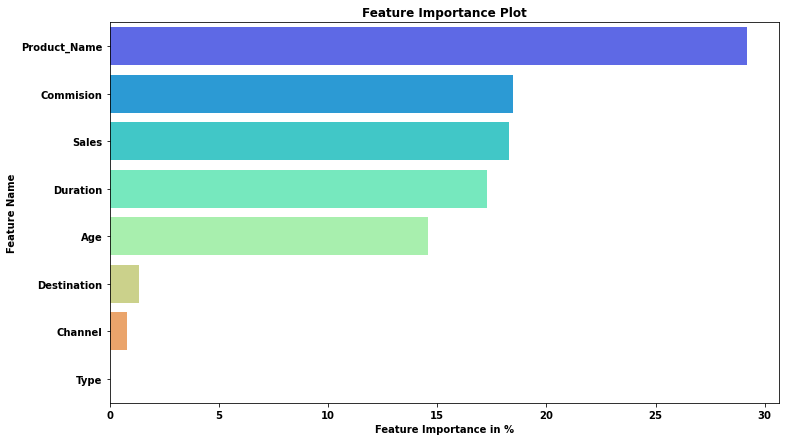

In [155]:
x=pd.DataFrame(dtree.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

#### Model 2 - RandomForest Classifier



In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [7,12],
    'max_features': [5, 7],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)


In [157]:
rfcl.fit(X_train, train_labels)

RandomForestClassifier()

In [158]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 12], 'max_features': [5, 7],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [159]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 7,
 'min_samples_leaf': 50,
 'min_samples_split': 300,
 'n_estimators': 301}

In [160]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=7, max_features=7, min_samples_leaf=50,
                       min_samples_split=300, n_estimators=301)

In [84]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


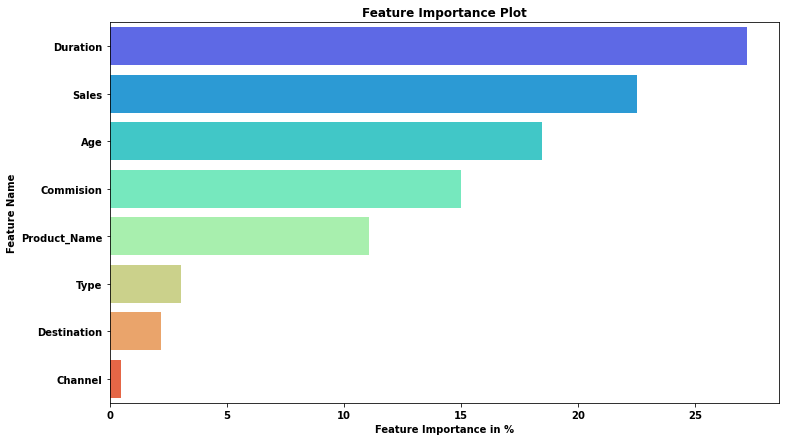

In [161]:
x=pd.DataFrame(rfcl.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

#### Model 3 - Neural Network model

In [202]:
from sklearn.neural_network import MLPClassifier


#### Feature Scaling

In [164]:
sc= StandardScaler()

In [165]:
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [203]:
mlp=MLPClassifier(hidden_layer_sizes=(600),solver='sgd',random_state=0,max_iter=600)

In [204]:
mlp.fit(X_train,train_labels)

MLPClassifier(hidden_layer_sizes=600, max_iter=600, random_state=0,
              solver='sgd')

### 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.

* Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy (1 pts), Confusion Matrix (2 pts), Plot ROC curve and get ROC_AUC score for each model (2 pts), Make classification reports for each model. Write inferences on each model (2 pts). Calculate Train and Test Accuracies for each model. Comment on the validness of models (overfitting or underfitting) Build confusion matrix for each model. Comment on the positive class in hand. Must clearly show obs/pred in row/col Plot roc_curve for each model. Calculate roc_auc_score for each model. Comment on the above calculated scores and plots. Build classification reports for each model. Comment on f1 score, precision and recall, which one is important here.

#### For Model 1 - CART

#### Getting predicted probabilities for the test data

In [168]:
ytest_predict_prob=dtree.predict_proba(X_test)
ytest_predict_prob

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [169]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

**Print Classification Report**

#### Print classification report for train_labels

In [170]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1464
           1       0.85      0.71      0.77       636

    accuracy                           0.87      2100
   macro avg       0.87      0.83      0.84      2100
weighted avg       0.87      0.87      0.87      2100



#### Inference: 

* By looking at the accuracy score of 94%, we can infere that the model is accurately fitted.

**Print Accuracy score for the train labels**

In [171]:
dtree.score(X_train, train_labels)

0.7423809523809524

**Print Confusion Matrix for train labels**

In [172]:
confusion_matrix(train_labels, ytrain_predict)

array([[1385,   79],
       [ 185,  451]], dtype=int64)

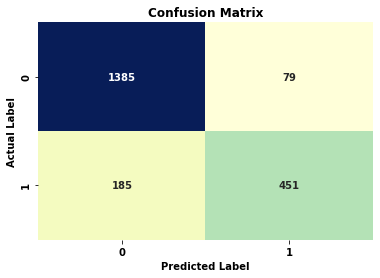

In [173]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

#### Print classification report for test_labels

In [174]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       612
           1       0.63      0.47      0.54       288

    accuracy                           0.74       900
   macro avg       0.71      0.67      0.68       900
weighted avg       0.73      0.74      0.73       900



**Accuracy Score for the test_labels**

In [175]:
dtree.score(X_test,test_labels)

0.74

**Print confusion_matrix for test_labels**

In [176]:
confusion_matrix(test_labels, ytest_predict)

array([[534,  78],
       [153, 135]], dtype=int64)

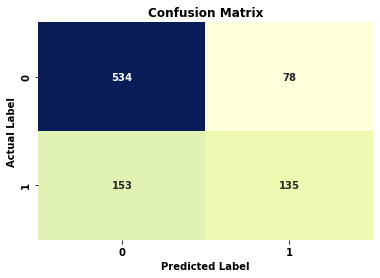

In [177]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

**Print Accuracy Score** - Accuracy is how accurately/cleanly does the model classify the data points. Lesser the false predictions, more the accuracy.

In [101]:
TP = 538
TN = 151
FP = 67
FN = 144

In [178]:
Accuracy = (TP+TN)/(TP+TN+FP+FN) 
Accuracy

0.7655555555555555

**Print Recall or Sensitivity Score** -  How many of the actual True data points are identified as True data points by the model. Remember, False Negatives are those data points which should have been identified as True.

In [179]:
Sensitivity = TP/(TP+FN)
Sensitivity

0.7888563049853372

**Specificity** - How many of the actual Negative data points are identified as negative by the model.

In [180]:
Spec = TN/(TN+FP)
Spec

0.6926605504587156

**Precision** - Among the points identified as Positive by the model, how many are really Positive.

In [181]:
Precision = TP/(TP+FP)
Precision

0.8892561983471075

**F1 Score** - It is the harmonic mean of Sensitivity and Precision.

that is: harmonic_mean(A,B) = (2AB/A+B) 

i.e. 2*Sensitivity*Precison/(Sensitivity+Precision)

In [182]:
F1_Score = 2*Sensitivity*Precision/(Sensitivity+Precision)
F1_Score

0.836052836052836

##### *For plotting the ROC curve, it is better to use probability value by predict.proba.

##### *So, first we will compute the probabilities values of the predict function.

In [183]:
train_predict_prob = dtree.predict_proba(X_train)
test_predict_prob = dtree.predict_proba(X_test)

#### Probability of test data prediction

In [184]:
test_prob1=test_predict_prob[:,1]

**Print the Area Under the Curve(AUC)** - Area under the ROC Curve- Larger the area under the curve,the better the model.

In [185]:
from sklearn.metrics import roc_auc_score

**Calculating the auc score for test labels**

In [186]:
auc_test = roc_auc_score(test_labels,test_prob1)

In [187]:
auc_test

0.6507352941176471

**Plotting roc curve for the test_data**

In [188]:
dt_fpr, dt_tpr,_=roc_curve(test_labels, test_prob1)

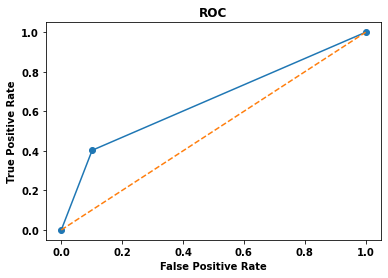

In [189]:
plt.plot(dt_fpr,dt_tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

#### For Model-2 - Random Forest

In [190]:
from sklearn.metrics import confusion_matrix,classification_report

In [191]:
confusion_matrix(train_labels,ytrain_predict1)

array([[1343,  121],
       [ 370,  266]], dtype=int64)

In [192]:
confusion_matrix(test_labels,ytest_predict1)

array([[573,  39],
       [178, 110]], dtype=int64)

In [193]:
print(classification_report(train_labels,ytrain_predict1))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85      1464
           1       0.69      0.42      0.52       636

    accuracy                           0.77      2100
   macro avg       0.74      0.67      0.68      2100
weighted avg       0.75      0.77      0.75      2100



In [194]:
print(classification_report(test_labels,ytest_predict1))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       612
           1       0.74      0.38      0.50       288

    accuracy                           0.76       900
   macro avg       0.75      0.66      0.67       900
weighted avg       0.76      0.76      0.73       900



AUC: 0.583


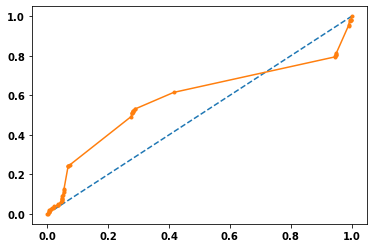

In [195]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.823


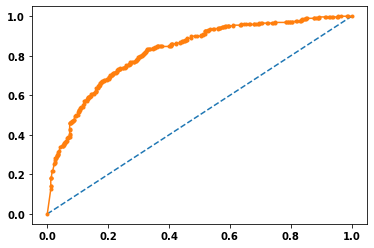

In [218]:
# AUC and ROC for the testing data

# predict probabilities
probs1 = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs1)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### For Model 3 - Artificial Neural Network

**Predictions on The training Set**

In [121]:
prediction_ann=mlp.predict(X_train)

**Check the Metrics for Predictions on the Training set**

[Accuracy Score, Classification Report, Confusion Matrix]

Accuracy for ANN model is 
 0.7614285714285715


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.78      0.92      0.84      1464
           1       0.68      0.39      0.50       636

    accuracy                           0.76      2100
   macro avg       0.73      0.66      0.67      2100
weighted avg       0.75      0.76      0.74      2100



Confusion Matrix for ANN model is


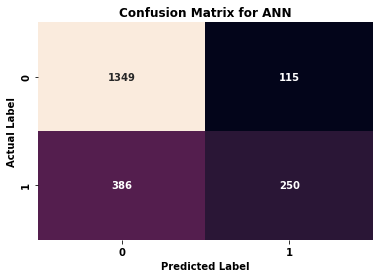

In [122]:
models_names={mlp:'ANN'}
print('Accuracy for {} model is'.format(models_names[mlp]),'\n',accuracy_score(train_labels,prediction_ann))
print('\n')
print('Classification report for {} model is'.format(models_names[mlp]),'\n',classification_report(train_labels,prediction_ann))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[mlp]))
sns.heatmap(confusion_matrix(train_labels,prediction_ann),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[mlp]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


**Check the Metrics for Predictions on the Test set**

[Accuracy Score, Classification Report, Confusion Matrix]

In [214]:
prediction_ann_1=mlp.predict(X_test)

Accuracy for ANN model is 
 0.7722222222222223


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       612
           1       0.68      0.55      0.61       288

    accuracy                           0.77       900
   macro avg       0.74      0.71      0.72       900
weighted avg       0.76      0.77      0.76       900



Confusion Matrix for ANN model is


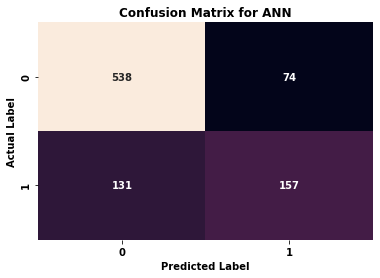

In [215]:
models_names={mlp:'ANN'}
print('Accuracy for {} model is'.format(models_names[mlp]),'\n',accuracy_score(test_labels,prediction_ann_1))
print('\n')
print('Classification report for {} model is'.format(models_names[mlp]),'\n',classification_report(test_labels,prediction_ann_1))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[mlp]))
sns.heatmap(confusion_matrix(test_labels,prediction_ann_1),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[mlp]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

* Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner (2.5 pts). Describe on which model is best/optimized (1.5 pts ). A table containing all the values of accuracies, precision, recall, auc_roc_score, f1 score. Comparison between the different models(final) on the basis of above table values. After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.

### Comparing Models on The test set

In [210]:
models=[dtree,grid_search,mlp]
models_names={dtree:'DecisionTreeClassifier',grid_search:'RandomForestClassifier',mlp:'ANN'}

Accuracy for DecisionTreeClassifier model is 
 0.7433333333333333


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       612
           1       0.63      0.47      0.54       288

    accuracy                           0.74       900
   macro avg       0.71      0.67      0.68       900
weighted avg       0.73      0.74      0.73       900



Confusion Matrix for DecisionTreeClassifier model is


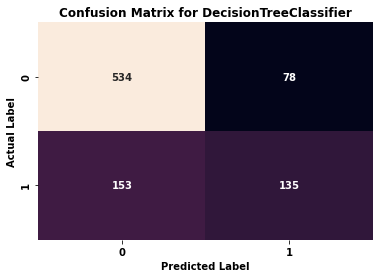

Accuracy for RandomForestClassifier model is 
 0.7588888888888888


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       0.76      0.94      0.84       612
           1       0.74      0.38      0.50       288

    accuracy                           0.76       900
   macro avg       0.75      0.66      0.67       900
weighted avg       0.76      0.76      0.73       900



Confusion Matrix for RandomForestClassifier model is


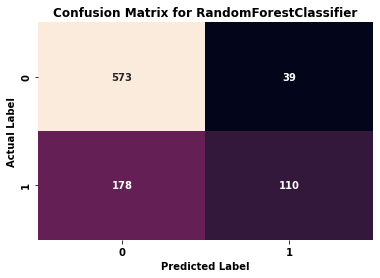

Accuracy for ANN model is 
 0.7722222222222223


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       612
           1       0.68      0.55      0.61       288

    accuracy                           0.77       900
   macro avg       0.74      0.71      0.72       900
weighted avg       0.76      0.77      0.76       900



Confusion Matrix for ANN model is


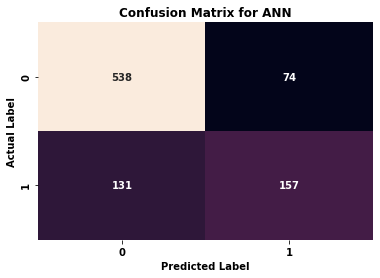

In [211]:
for i in models:
    i.fit(X_train,train_labels)
    print('Accuracy for {} model is'.format(models_names[i]),'\n',accuracy_score(test_labels,i.predict(X_test)))
    print('\n')
    print('Classification report for {} model is'.format(models_names[i]),'\n',classification_report(test_labels,i.predict(X_test)))
    print('\n')
    print('Confusion Matrix for {} model is'.format(models_names[i]))
    sns.heatmap(confusion_matrix(test_labels,i.predict(X_test)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(models_names[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

#### Compare ROC curves and Calculate Area under the curve for all models

Area under the curve for Decision Tree Classification Model is 0.7163897966594045
Area under the curve for Random Forest Classification Model is 0.8246073892519972
Area under the curve for Artificial Neural Network Model is 0.7842030909586055


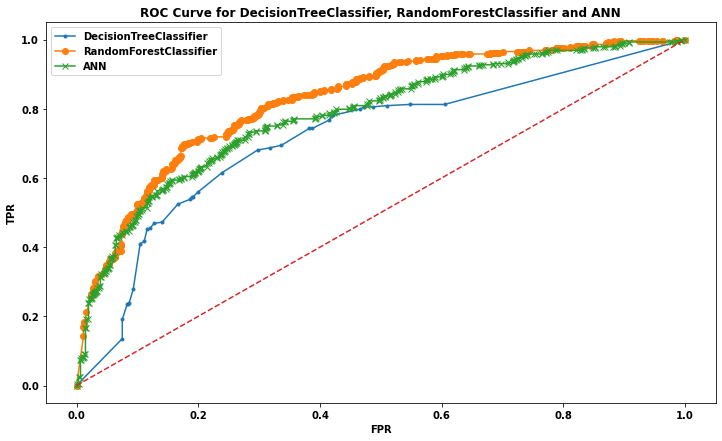

In [212]:
print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(test_labels,dtree.predict_proba(X_test)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(test_labels,grid_search.predict_proba(X_test)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(test_labels,mlp.predict_proba(X_test)[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(test_labels, dtree.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(test_labels, grid_search.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(test_labels, mlp.predict_proba(X_test)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

#### Inference:


* After comparing the above models and their scores we can say that the ANN model is best optimised among all. 

* If we compare the model accuracy, then ANN has the 76% accuracy on test data which is equivalent to the random forest. However, if we compare the AUC score, we can easily find out the best optimised model is ANN, because it has the highest auc score of almost 80%.  

### 2.5 Based on the whole Analysis, what are the business insights and recommendations.

* We have noticed that a few features like Duration, Product_Name, Sales and Commision are the top deciding factors for a customer, whether he'll claim or not. 

* Therefore, we can say that those customers who opt for customised plan in the product_type category are more likely to claim, and those who travel for longer duration are more likely to claim. 

* So, the business can increase the price of insurance plan for customised plan, and for long duration travel and with high age group people. 